# FIG A

saving figure to file D:/重要文件/小论文/图片/fig4/A.png


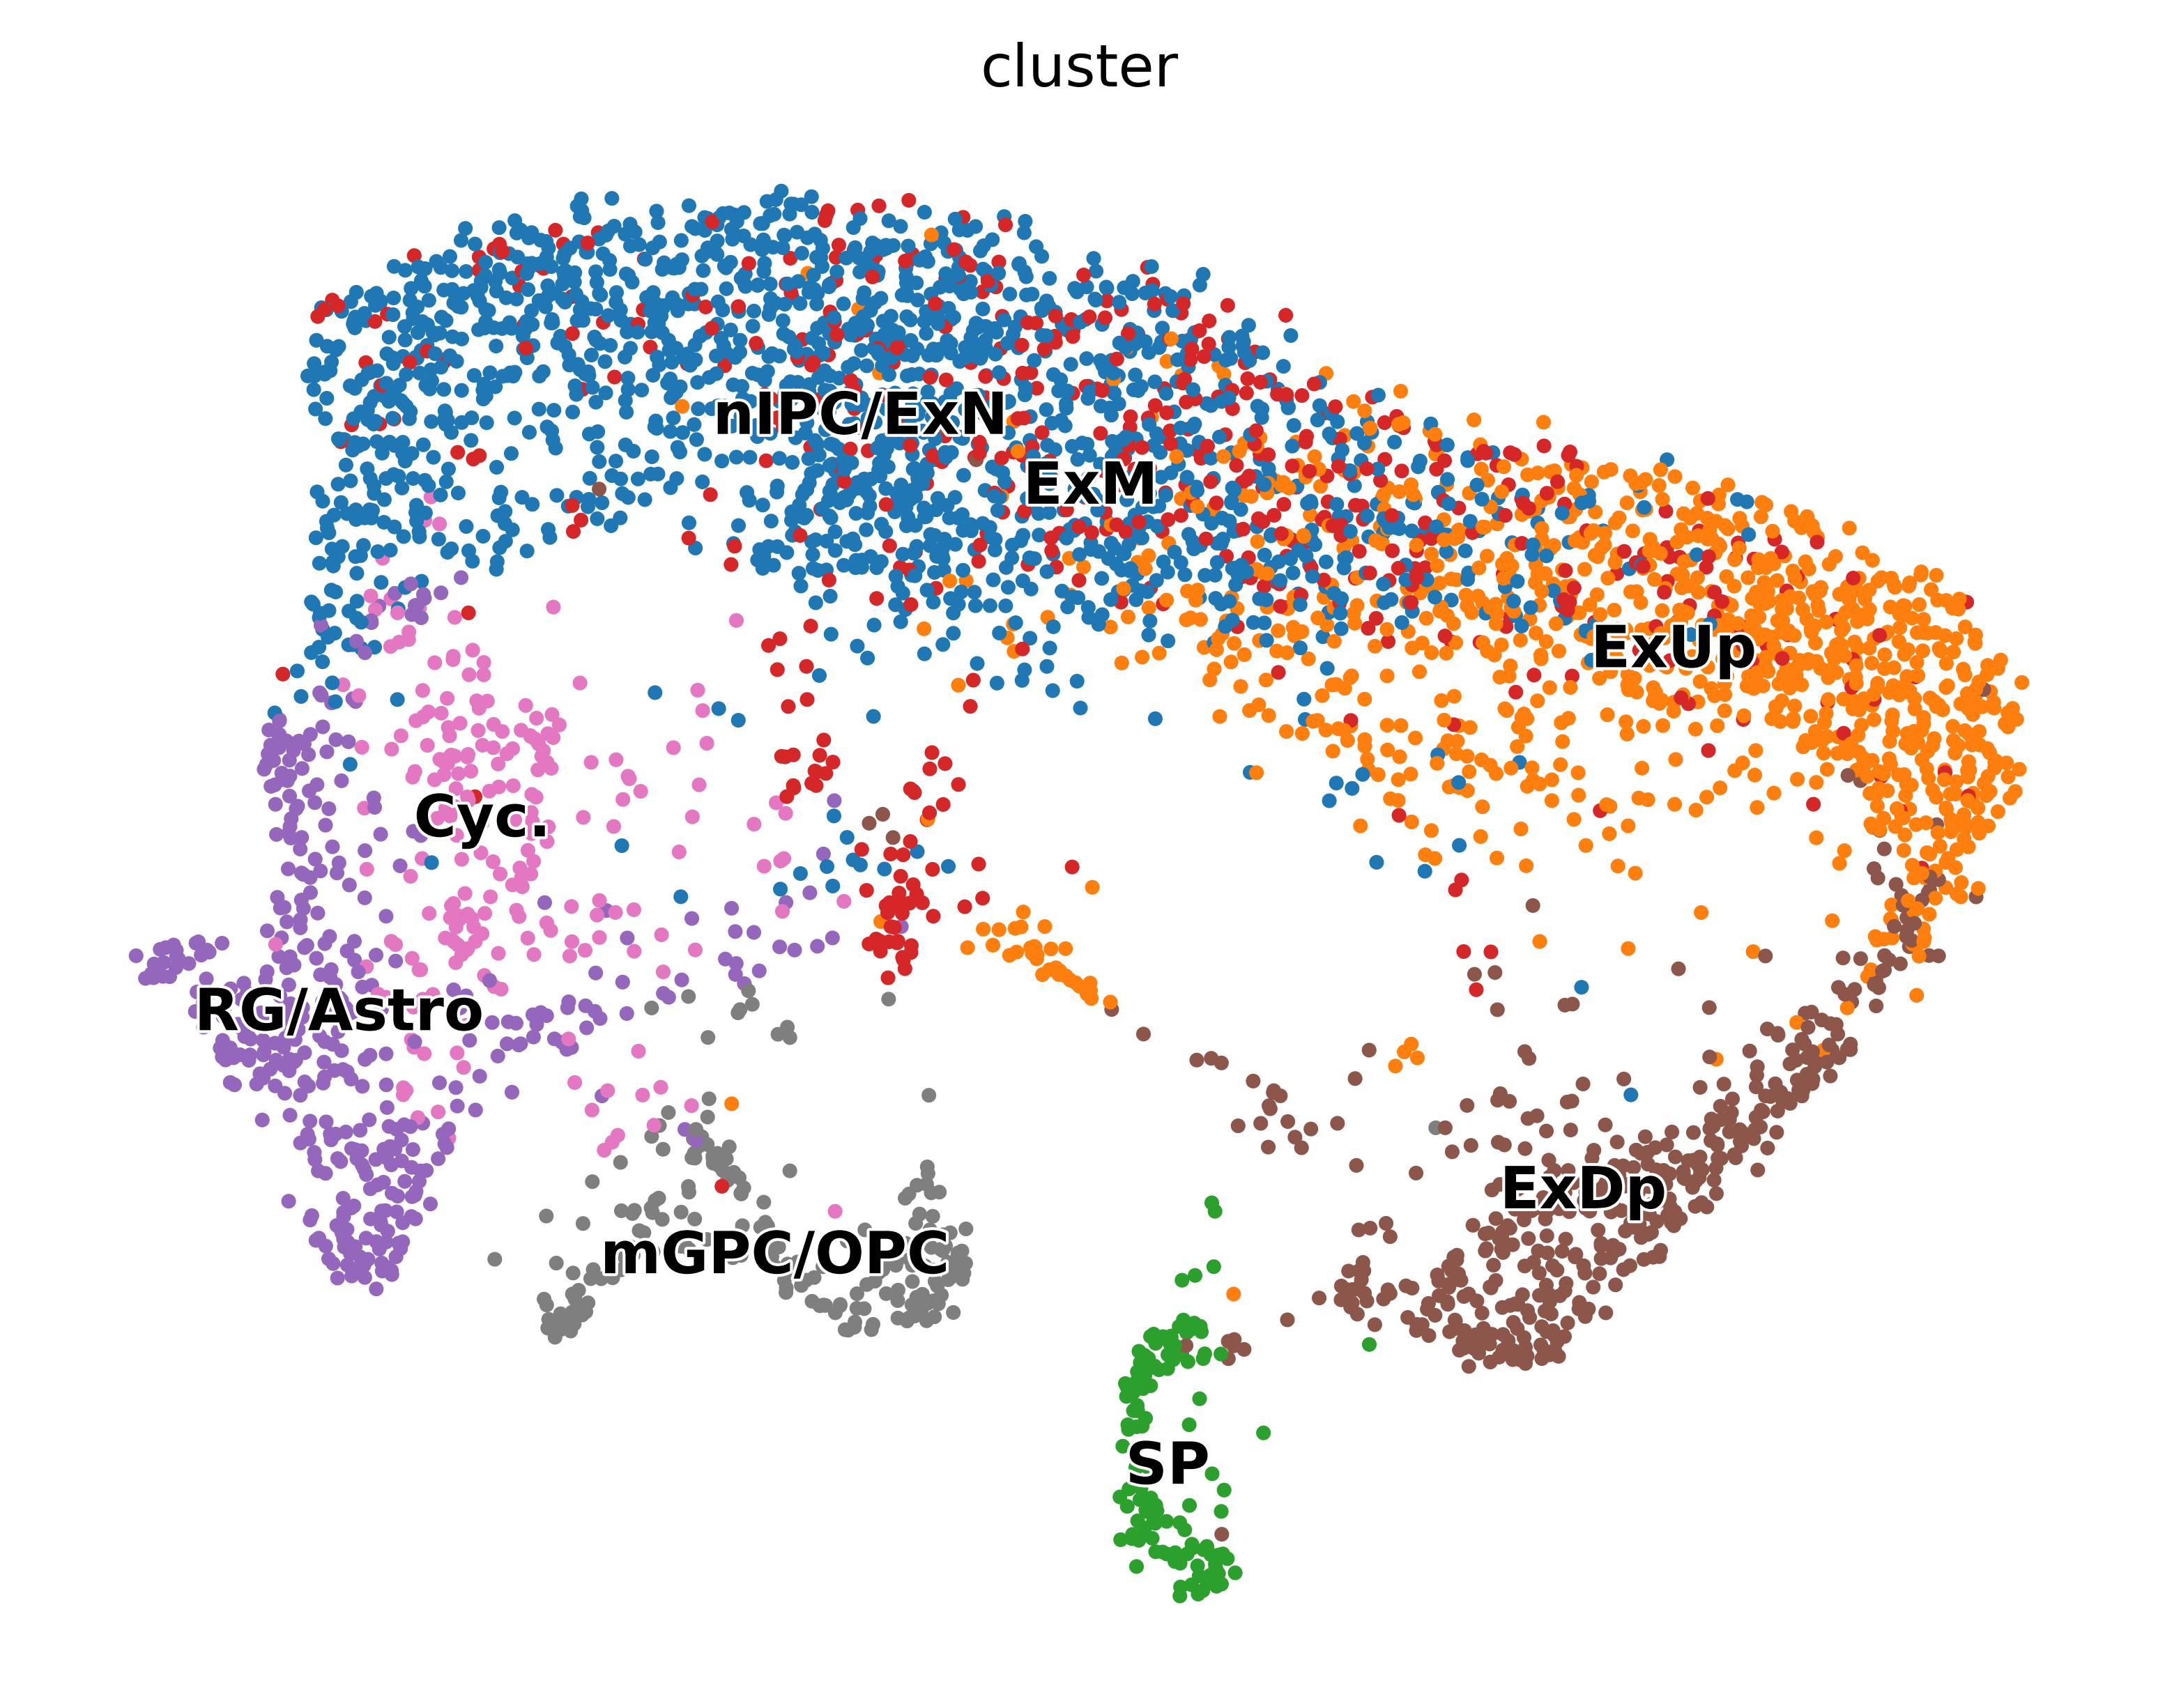

In [ ]:
import scanpy as sc 
import scvelo as scv 
adata=sc.read_h5ad(r"D:\code\mine\test_data\atac_u_s\human_brain_rna_after_filt_r2.h5ad")
scv.pl.umap(adata, color=['cluster'],dpi=600,save='D:/重要文件/小论文/图片/fig4/A.png') 

In [ ]:
import gtvelo as gtv
import scanpy as sc
import scvelo as scv
import numpy as np
import anndata as ad
import torch as th

adata_rna = sc.read_h5ad(r"D:\code\mine\test_data\atac_u_s\human_brain_rna_after_filt_r2.h5ad") 
adata_atac = sc.read_h5ad(r"D:\code\mine\test_data\atac_u_s\human_brain_atac_gene_after_filt_r2.h5ad")

adata_rna.layers['Mc']=adata_atac.layers['Mc'] 
adata=adata_rna
adata = gtv.utils.atac_clean_recipe(adata,
    spliced_key='spliced',           # 您数据集中已有的spliced层
    unspliced_key='unspliced',       # 您数据集中已有的unspliced层
    batch_key='batch',               # 您数据集中的batch信息
    celltype_key='cluster',          # 使用cluster作为细胞类型标注
    normalize_library=True,          # 建议开启library size归一化
    n_top_genes=None,               # 因为您的基因数较少(954个)，建议不做过滤
    smooth=True,                     # 开启平滑处理
    umap=False,                      # 因为已经有X_umap，可以设为False
    log=True,                        # 建议对数据做log转换
    n_neighbors=30)
adata.write(r'D:\code\mine\GTvelo\1_adata_latentadata\10x_human_cerebral.h5ad')


# FIG4 B

Warning, folder already exists. This may overwrite a previous fit.
295 velocity genes used
epoch 0, full loss 384508.969, val loss 346410.094, recon 298.058, traj 571371.375, velo -2.092
epoch 1, full loss 238237.859, val loss 162093.625, recon 140.420, traj 600239.188, velo -1.548
epoch 2, full loss 128515.109, val loss 99615.617, recon 64.765, traj 430162.188, velo -0.931
epoch 3, full loss 95868.805, val loss 71595.250, recon 39.269, traj 382529.625, velo -0.736
epoch 4, full loss 83089.086, val loss 58506.152, recon 27.885, traj 371376.062, velo -0.562
epoch 5, full loss 73550.023, val loss 51984.738, recon 21.505, traj 377594.562, velo -0.590
epoch 6, full loss 64934.020, val loss 46900.906, recon 10.470, traj 367497.281, velo -0.697
epoch 7, full loss 59189.406, val loss 43682.605, recon 6.482, traj 361299.156, velo -0.714
epoch 8, full loss 55671.004, val loss 41907.699, recon 3.640, traj 360859.938, velo -0.398
epoch 9, full loss 47131.902, val loss 39872.516, recon 2.129, traj

  0%|          | 0/4693 [00:00<?, ?cells/s]

    finished (0:00:01) --> added 
    'spliced_velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'spliced_velocity_umap', embedded velocity vectors (adata.obsm)


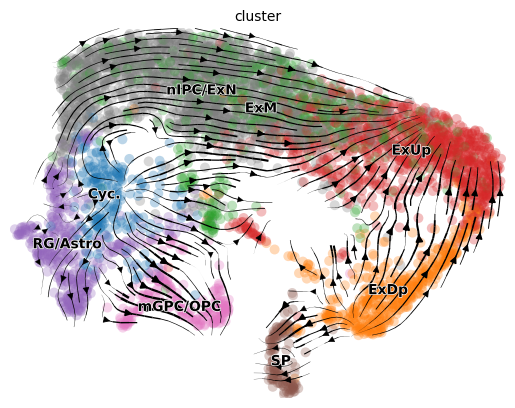

computing velocity embedding
    finished (0:00:00) --> added
    'spliced_velocity_pca', embedded velocity vectors (adata.obsm)
computing velocity graph (using 1/28 cores)


  0%|          | 0/4693 [00:00<?, ?cells/s]

    finished (0:00:12) --> added 
    'velo_s_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velo_s_pca', embedded velocity vectors (adata.obsm)


In [ ]:
import gtvelo as gtv
import scanpy as sc
import scvelo as scv
import numpy as np
import anndata as ad
import torch as th
adata= sc.read_h5ad(r'D:\code\mine\GTvelo\1_adata_latentadata\10x_human_cerebral.h5ad')
model = gtv.models.ATACRegModel(observed=954, latent_dim=20, zr_dim=2, h_dim=2) 
epochs, val_ae, val_traj = gtv.train_atac(model, adata, batch_size = 100, 
                                      epochs=50, name='atac_reg2', grad_clip=1000)
latent_adata, adata = gtv.output_atac_results(model, adata, gene_velocity=True)
scv.tl.velocity_graph(latent_adata, vkey='spliced_velocity')
scv.pl.velocity_embedding_stream(latent_adata,vkey='spliced_velocity', color=['cluster'],)

scv.tl.velocity_embedding(latent_adata, vkey='spliced_velocity', basis='pca')

scv.tl.velocity_graph(adata, vkey='velo_s')
scv.tl.velocity_embedding(adata, vkey='velo_s', basis='pca')
adata.write(r'D:\code\mine\GTvelo\1_adata_latentadata\10x_latentfina_adata2.h5ad')
latent_adata.write(r'D:\code\mine\GTvelo\1_adata_latentadata\10x_latentfina_latent_adata2.h5ad') 

computing velocity embedding
    finished (0:00:00) --> added
    'spliced_velocity_umap', embedded velocity vectors (adata.obsm)
saving figure to file D:/重要文件/小论文/图片/fig4/B4.png


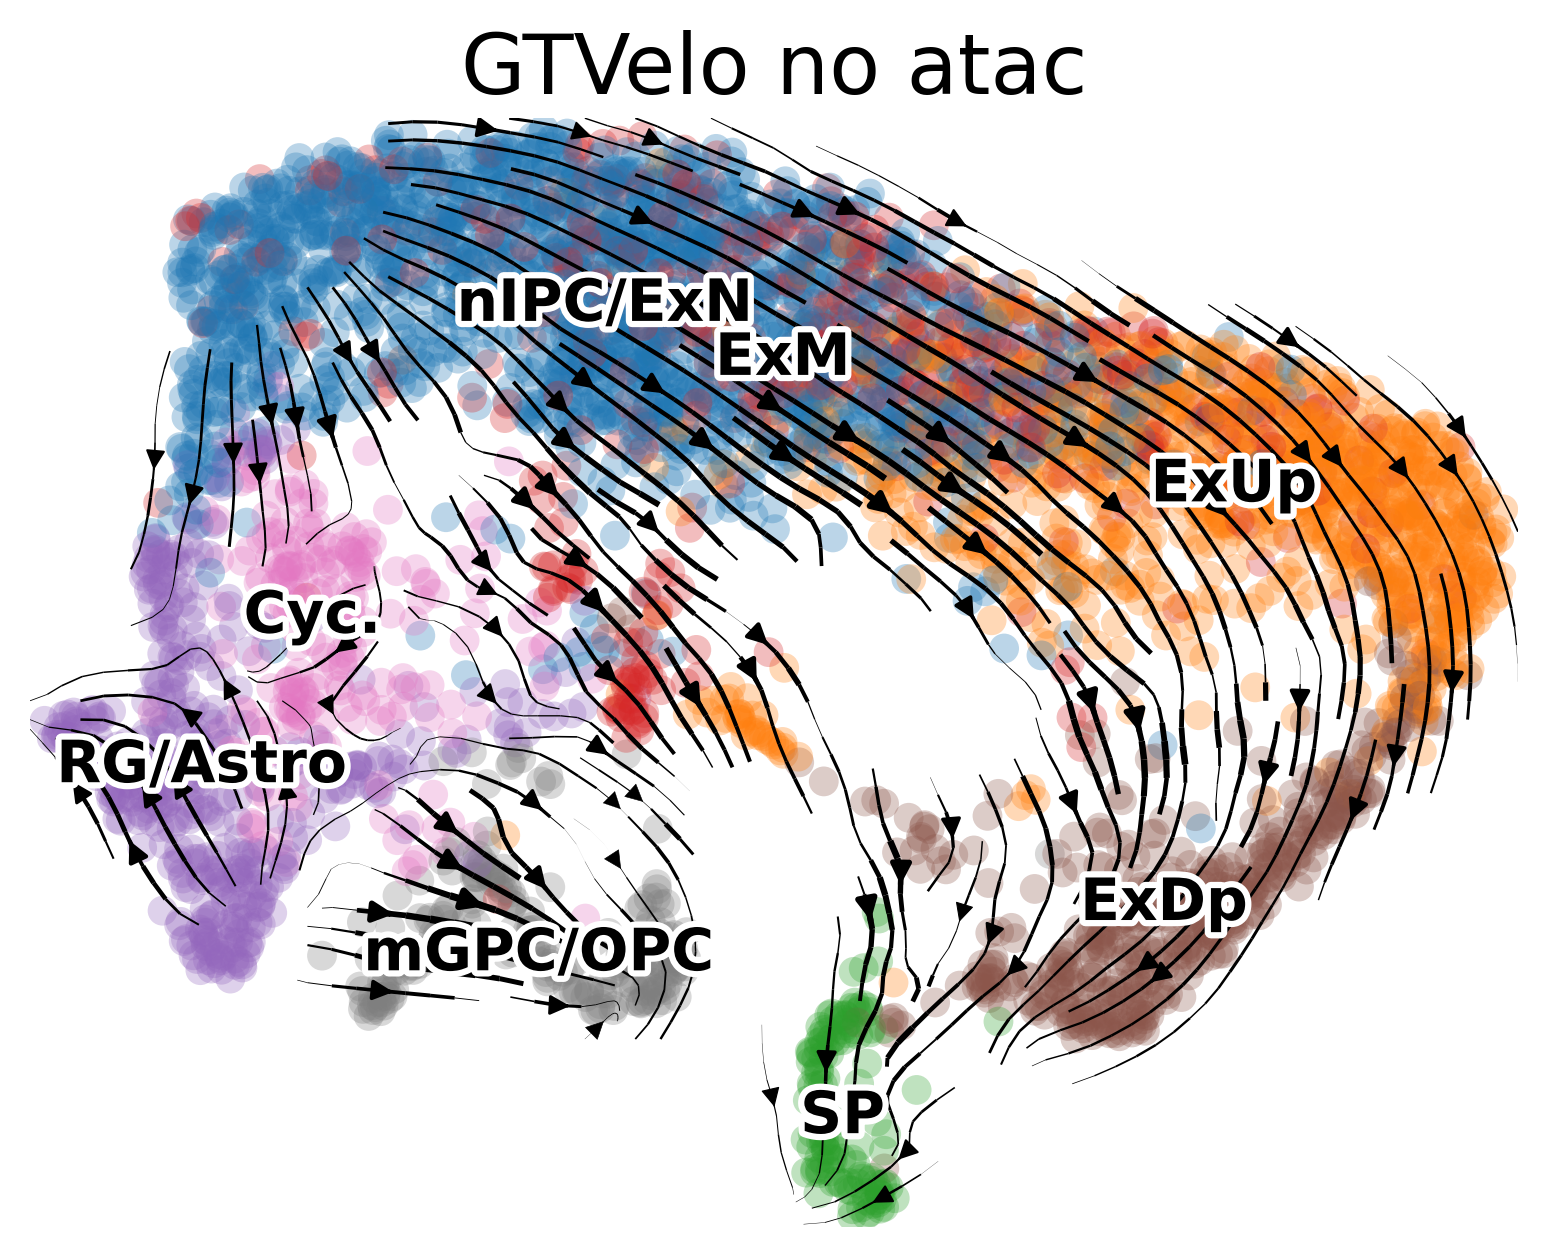

In [ ]:
adata1=sc.read_h5ad(r'D:\code\mine\GTvelo\1_adata_latentadata\10x_human_cerefina_latent_adata3.h5ad') 

    
multi_adata=sc.read_h5ad(r"D:\code\MultiVelo-main\HSS\multivelo_human_cere_adata.h5ad") 
import pandas as pd 
adata1.obs['cluster'] = pd.Categorical(latent_adata.obs['cluster'], categories=multi_adata.obs['cluster'].cat.categories)
scv.pl.velocity_embedding_stream(adata1,vkey='spliced_velocity', color=['cluster'],dpi=300,title='GTVelo_no_atac',save='D:/重要文件/小论文/图片/fig4/B4.png',    legend_fontsize=14, 
    legend_fontoutline=3 ,
    fontsize=20)

# FIG4 C

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
import seaborn as sns

# 选择细胞群体
selected_clusters = ['Cyc.', 'nIPC', 'ExM', 'ExUp']
adata_filtered = adata[adata.obs['cluster'].isin(selected_clusters)]

# 获取各模态数据
# 将稀疏矩阵转换为稠密矩阵
spliced = np.asarray(adata_filtered.layers['Ms'].toarray())  # 拼接RNA
unspliced = np.asarray(adata_filtered.layers['Mu'].toarray())  # 未拼接RNA
chromatin = np.asarray(adata_filtered.layers['Mc'].toarray())  # 染色质可及性
chromatin_normalized = preprocessing.scale(chromatin, axis=1)  # 按hang（gene）标准化
unspliced_normalized = preprocessing.scale(unspliced, axis=1)
spliced_normalized = preprocessing.scale(spliced, axis=1)

# # 定义聚类的函数
def perform_clustering(data, n_clusters_range=range(2, 21)):
    best_n_clusters = None
    distances = []
    
    for n_clusters in n_clusters_range:
        gmm = GaussianMixture(n_components=n_clusters, random_state=42)
        gmm.fit(data)  # 拟合数据
        cluster_centers = gmm.means_
        dist = np.mean(np.linalg.norm(cluster_centers[:, None] - cluster_centers, axis=2))
        distances.append(dist)
    
    # 选择最佳的聚类数
    best_n_clusters = n_clusters_range[np.argmin(distances)]
    return best_n_clusters, distances

# 对每个数据模态进行聚类
best_spliced_clusters, spliced_distances = perform_clustering(spliced)
best_unspliced_clusters, unspliced_distances = perform_clustering(unspliced)
best_chromatin_clusters, chromatin_distances = perform_clustering(chromatin)

# 输出最佳聚类数
print(f"最佳拼接RNA聚类数: {best_spliced_clusters}")
print(f"最佳未拼接RNA聚类数: {best_unspliced_clusters}")
print(f"最佳染色质可及性聚类数: {best_chromatin_clusters}")

#都是2

In [ ]:
# 对每个数据模态进行最终的软聚类
best_spliced_clusters=2
best_unspliced_clusters=2
best_chromatin_clusters=2
gmm_spliced = GaussianMixture(n_components=best_spliced_clusters, random_state=42)
gmm_spliced.fit(spliced)
adata_filtered.obs['spliced_cluster'] = gmm_spliced.predict(spliced)

gmm_unspliced = GaussianMixture(n_components=best_unspliced_clusters, random_state=42)
gmm_unspliced.fit(unspliced)
adata_filtered.obs['unspliced_cluster'] = gmm_unspliced.predict(unspliced)

gmm_chromatin = GaussianMixture(n_components=best_chromatin_clusters, random_state=42)
gmm_chromatin.fit(chromatin)
adata_filtered.obs['chromatin_cluster'] = gmm_chromatin.predict(chromatin)
 

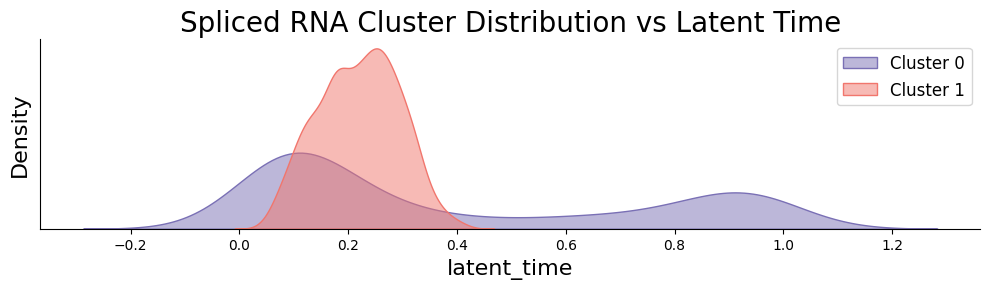

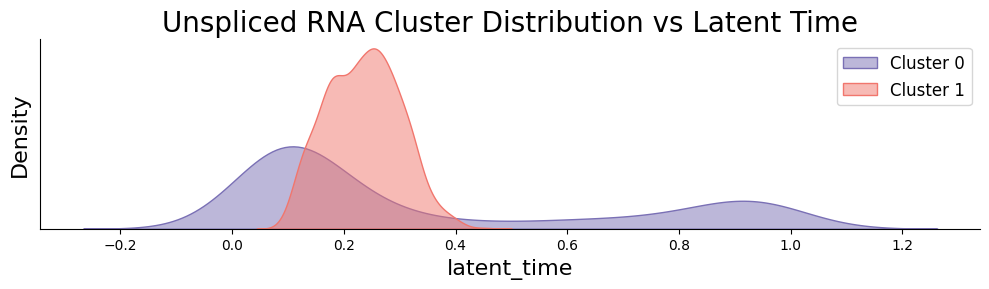

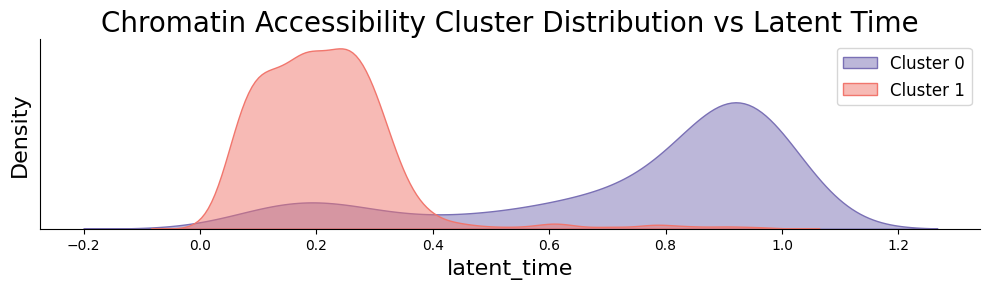

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.gridspec as gridspec

# 1. Top density plot only
def plot_hexbin_with_marginals(data, cluster_column, data_label):
    # Set up figure and colors
    fig = plt.figure(figsize=(10, 3))
    colors = {'0': '#7A70B5', '1': '#F1766D'}
    
    # Create plot
    ax = plt.subplot(1, 1, 1)
    
    # Plot density for each cluster
    for cluster_id in ['0', '1']:
        mask = adata_filtered.obs[cluster_column] == int(cluster_id)
        x = adata_filtered.obs['latent_time'][mask]
        sns.kdeplot(x, ax=ax, color=colors[cluster_id], fill=True, alpha=0.5, 
                   label=f'Cluster {cluster_id}')
    
    # Styling
    ax.set_xlabel('latent_time', fontsize=16)
    ax.set_ylabel('Density', fontsize=16)
    ax.set_yticks([])
    ax.legend(fontsize=12)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    plt.title(f'{data_label} Cluster Distribution vs Latent Time', fontsize=20)
    plt.tight_layout()
    
    filename = f'{data_label}_density.png'
    #plt.savefig(f'D:/重要文件/小论文/图片/fig4/{filename}', dpi=600)
    plt.show()


# Call the function(s) you want to use
plot_hexbin_with_marginals(spliced, 'spliced_cluster', 'Spliced RNA')
# plot_density_contours(spliced, 'spliced_cluster', 'Spliced RNA')
# plot_trend_with_ci(spliced, 'spliced_cluster', 'Spliced RNA')
# plot_ridge(spliced, 'spliced_cluster', 'Spliced RNA')
# plot_facet_density(spliced, 'spliced_cluster', 'Spliced RNA')

# Replace with unspliced or chromatin as needed
plot_hexbin_with_marginals(unspliced, 'unspliced_cluster', 'Unspliced RNA')
plot_hexbin_with_marginals(chromatin, 'chromatin_cluster', 'Chromatin Accessibility')

# FIG4 D

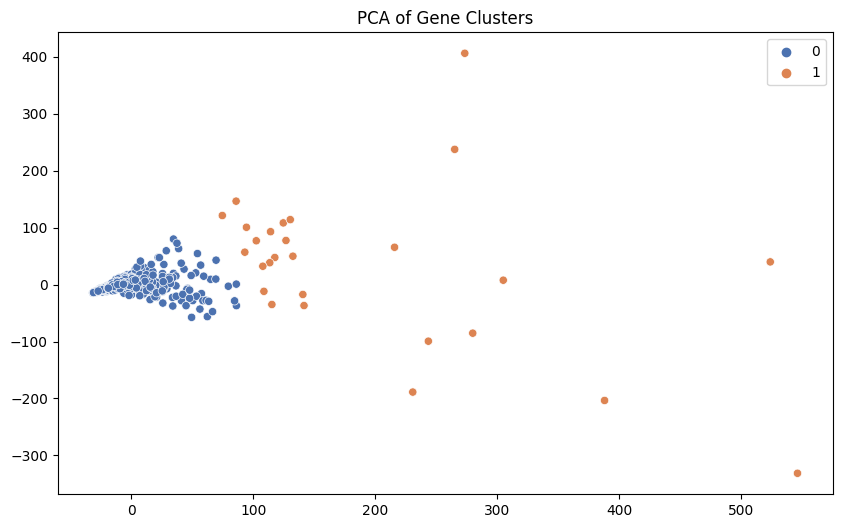

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns

# 使用PCA降维
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data)

# 假设您已选择最佳集群数，例如3
gmm = GaussianMixture(n_components=2, covariance_type='full', random_state=0)
labels = gmm.fit_predict(data)


plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=labels, palette='deep')

# Set title with fontsize=20
plt.title('PCA of Clusters', fontsize=20)
plt.xlabel('PC1', fontsize=20)
plt.ylabel('PC2', fontsize=20)

# Modify legend labels to display 'Cluster 0' and 'Cluster 1'
handles, labels_ = plt.gca().get_legend_handles_labels()  # Get current legend handles and labels
labels = ['Cluster 0', 'Cluster 1']  # New legend labels
plt.legend(handles=handles, labels=labels, fontsize=20)

# Save the figure with dpi=600
plt.savefig('D:/重要文件/小论文/图片/fig4/C4pca.png', dpi=600)

# Display the plot
#plt.show()

# FIG4 E

In [ ]:
import latentvelo as gtv
import scanpy as sc
import scvelo as scv
import numpy as np
import anndata as ad
import torch as th
adata= sc.read_h5ad(r'D:\code\mine\GTvelo\1_adata_latentadata\10x_human_cerebral.h5ad')

In [ ]:
adata 

AnnData object with n_obs × n_vars = 4693 × 954
    obs: 'batch', 'cluster', 'n_counts', 'spliced_size_factor', 'unspliced_size_factor', 'batch_id', 'celltype_id', 'root', 'terminal'
    var: 'velocity_genes'
    uns: 'neighbors', 'pca', 'scale_spliced', 'scale_unspliced', 'index_test'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'Mc', 'Ms', 'Mu', 'atac', 'mask_spliced', 'mask_unspliced', 'spliced', 'spliced_counts', 'spliced_raw', 'unspliced', 'unspliced_counts', 'unspliced_raw'
    obsp: 'adj', 'connectivities', 'distances'

In [ ]:
model = gtv.models.VAE(observed=954, latent_dim=20, zr_dim=2, h_dim=2)

epochs, val_ae, val_traj = gtv.train(model, adata, batch_size = 100, 
                                      epochs=50, name='human_brain2', grad_clip=1000)
latent_adata, adata = gtv.output_results(model, adata, gene_velocity=True)
scv.tl.velocity_graph(latent_adata, vkey='spliced_velocity')

#scv.pl.velocity_embedding_stream(latent_adata,vkey='spliced_velocity', color=['cluster'],)
adata.write(r'D:\code\mine\GTvelo\1_adata_latentadata\10x_human_cerefina_adata3.h5ad')
latent_adata.write(r'D:\code\mine\GTvelo\1_adata_latentadata\10x_human_cerefina_latent_adata3.h5ad') 
cluster_edges = [("Cyc.", "RG/Astro"), ("Cyc.", "mGPC/OPC"), ("Cyc.", "nIPC/ExN"), ("nIPC/ExN", "ExM"), ("ExM", "ExUp")]
pancreas_pca = gtv.ev.cross_boundary_correctness(latent_adata,
                                  'cluster', 'spliced_velocity_pca', cluster_edges, x_emb='X_pca', 
                                                  majority_vote=True, return_raw=False)
pancreas_pca

Warning, folder already exists. This may overwrite a previous fit.
295 velocity genes used
epoch 0, full loss 75.784, val loss 129.372, recon MSE 0.286, traj MSE 0.311, reg loss -0.121
epoch 1, full loss 14.315, val loss 33.485, recon MSE 0.466, traj MSE 0.466, reg loss 0.071
epoch 2, full loss -26.276, val loss -11.756, recon MSE 0.365, traj MSE 0.365, reg loss -0.696
epoch 3, full loss -59.025, val loss -46.358, recon MSE 0.344, traj MSE 0.344, reg loss 0.025
epoch 4, full loss -66.497, val loss -61.369, recon MSE 0.250, traj MSE 0.250, reg loss -0.379
epoch 5, full loss -67.705, val loss -67.799, recon MSE 0.184, traj MSE 0.184, reg loss -0.351
epoch 6, full loss -68.860, val loss -73.312, recon MSE 0.255, traj MSE 0.255, reg loss 0.000
epoch 7, full loss -65.634, val loss -74.532, recon MSE 0.251, traj MSE 0.251, reg loss 0.000
epoch 8, full loss -72.903, val loss -75.918, recon MSE 0.237, traj MSE 0.237, reg loss -0.330
epoch 9, full loss -76.379, val loss -77.485, recon MSE 0.248

  0%|          | 0/4693 [00:00<?, ?cells/s]

    finished (0:00:01) --> added 
    'spliced_velocity_graph', sparse matrix with cosine correlations (adata.uns)


IndexError: list index out of range

In [ ]:

scv.tl.velocity_embedding(latent_adata, vkey='spliced_velocity', basis='pca')
latent_adata

computing velocity embedding
    finished (0:00:01) --> added
    'spliced_velocity_pca', embedded velocity vectors (adata.obsm)


AnnData object with n_obs × n_vars = 4693 × 20
    obs: 'batch', 'cluster', 'n_counts', 'spliced_size_factor', 'unspliced_size_factor', 'batch_id', 'celltype_id', 'root', 'terminal', 'latent_time', 'spliced_velocity_self_transition'
    uns: 'neighbors', 'pca', 'scale_spliced', 'scale_unspliced', 'index_test', 'spliced_velocity_graph', 'spliced_velocity_graph_neg', 'spliced_velocity_params'
    obsm: 'X_umap', 'X_pca', 'zr', 'spliced_velocity_pca'
    layers: 'spliced', 'spliced_traj', 'spliced_velocity', 'unspliced', 'unspliced_traj', 'unspliced_velocity'
    obsp: 'adj', 'connectivities', 'distances'

In [ ]:
pancreas_pca = gtv.ev.cross_boundary_correctness(latent_adata,
                                  'cluster', 'spliced_velocity_pca', cluster_edges, x_emb='X_pca')
pancreas_pca                                  
                       

({('Cyc.', 'RG/Astro'): 0.12006658496350184,
  ('Cyc.', 'mGPC/OPC'): 0.2337374154640462,
  ('Cyc.', 'nIPC/ExN'): 0.026922092908857966,
  ('nIPC/ExN', 'ExM'): 0.046814041855435626,
  ('ExM', 'ExUp'): 0.11024833596966536},
 0.1075576942323014)

In [ ]:
import scanpy as sc 
import scvelo as scv 
import gtvelo as gtv 
##no a
#adata1=sc.read_h5ad(r'D:\code\mine\GTvelo\1_adata_latentadata\10x_human_cerefina_adata3.h5ad')

latent_adata1=sc.read_h5ad(r'D:\code\mine\GTvelo\1_adata_latentadata\10x_human_cerefina_latent_adata3.h5ad') 
scv.tl.velocity_graph(latent_adata1, vkey='spliced_velocity')
scv.tl.velocity_embedding(latent_adata1, vkey='spliced_velocity', basis='pca')
cluster_edges = [("Cyc.", "RG/Astro"), ("Cyc.", "mGPC/OPC"), ("Cyc.", "nIPC/ExN"), ("nIPC/ExN", "ExM"), ("ExM", "ExUp")]
pancreas_pca1 = gtv.ev.cross_boundary_correctness(latent_adata1,
                                  'cluster', 'spliced_velocity_pca', cluster_edges, x_emb='X_pca', 
                                                  majority_vote=True, return_raw=True)
## a   

#adata2=sc.read_h5ad(r'D:\code\mine\GTvelo\1_adata_latentadata\10x_latentfina_adata2.h5ad')
latent_adata2=sc.read_h5ad(r"D:\code\mine\GTvelo\1_adata_latentadata\10x_humancerefina_latent_adata2.h5ad")     
pancreas_pca2 = gtv.ev.cross_boundary_correctness(latent_adata2,
                                  'cluster', 'spliced_velocity_pca', cluster_edges, x_emb='X_pca', 
                                                  majority_vote=True, return_raw=True)
#LATENTVELO
latent_adata3=sc.read_h5ad(r"D:\code\mine\finish\latentvelo\lat_adata_latent\10xhuman_corfina_latent_adata.h5ad")
pancreas_pca3 = gtv.ev.cross_boundary_correctness(latent_adata3,
                                  'cluster', 'spliced_velocity_pca', cluster_edges, x_emb='X_pca', 
                                                  majority_vote=True, return_raw=True)

computing velocity graph (using 1/28 cores)


  0%|          | 0/4693 [00:00<?, ?cells/s]

    finished (0:00:01) --> added 
    'spliced_velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'spliced_velocity_pca', embedded velocity vectors (adata.obsm)


In [ ]:
import scanpy as sc 
import gtvelo as gtv 
##MULTIVELO
latent_adata3=sc.read_h5ad(r"D:\code\MultiVelo-main\HSS\multivelo_human_cere_adata.h5ad") 
latent_adata3

AnnData object with n_obs × n_vars = 4693 × 747
    obs: 'cluster', 'batch', 'n_counts', 'velocity_self_transition', 'velo_s_self_transition'
    var: 'fit_r2', 'fit_alpha', 'fit_beta', 'fit_gamma', 'fit_t_', 'fit_scaling', 'fit_std_u', 'fit_std_s', 'fit_likelihood', 'fit_u0', 'fit_s0', 'fit_pval_steady', 'fit_steady_u', 'fit_steady_s', 'fit_variance', 'fit_alignment_scaling', 'velocity_genes', 'fit_alpha_c', 'fit_t_sw1', 'fit_t_sw2', 'fit_t_sw3', 'fit_scale_cc', 'fit_rescale_c', 'fit_rescale_u', 'fit_model', 'fit_direction', 'fit_loss', 'fit_likelihood_c', 'fit_ssd_c', 'fit_var_c', 'fit_c0', 'fit_anchor_min_idx', 'fit_anchor_max_idx', 'fit_anchor_velo_min_idx', 'fit_anchor_velo_max_idx', 'velo_s_genes', 'velo_u_genes', 'velo_chrom_genes'
    uns: 'cluster_colors', 'neighbors', 'pca', 'recover_dynamics', 'umap', 'velo_chrom_params', 'velo_s_graph', 'velo_s_graph_neg', 'velo_s_params', 'velo_u_params', 'velocity_graph', 'velocity_graph_neg', 'velocity_params'
    obsm: 'X_pca', 'X_umap'

In [ ]:
cluster_edges = [("Cyc.", "RG/Astro"), ("Cyc.", "mGPC/OPC"), ("Cyc.", "nIPC/ExN"), ("nIPC/ExN", "ExM"), ("ExM", "ExUp")]
pancreas_pca3 = gtv.ev.cross_boundary_correctness(latent_adata3,
                                  'cluster', 'velo_s_pca', cluster_edges, x_emb='X_pca', 
                                                  majority_vote=True, return_raw=True)
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

tran2 = pd.DataFrame({" ": [t[0] + r'$\rightarrow$' + t[1] for t in pancreas_pca3.keys()], "CBDir score": pancreas_pca3.values()})



# 将每个列表展开为多个列
def expand_lists(df, col_name):
    # 找到CBDir score列中的最大长度
    max_len = df[col_name].apply(len).max()
    # 展开每个列表为独立的列
    expanded = pd.DataFrame(df[col_name].to_list(), columns=[f'{col_name}_{i+1}' for i in range(max_len)])
    # 将原始列删除，并将展开的列与原来的DataFrame合并
    df = df.drop(columns=[col_name])
    return pd.concat([df, expanded], axis=1)
 
tran2_expanded = expand_lists(tran2, 'CBDir score')

 
tran2_expanded['Source'] = 'multi2'

# 将三个数据集合并在一起
#combined_df = pd.concat([late2_expanded, scvl2_expanded, tran2_expanded], ignore_index=True)

# 将合并后的数据写入一个Excel文件中的同一个sheet
tran2_expanded.to_excel('no_atac_multi.xlsx', index=False)


## 我给他保存到了no_atac  话说 no_atac2当时是干什么的

数据已保存到 combined_output.xlsx


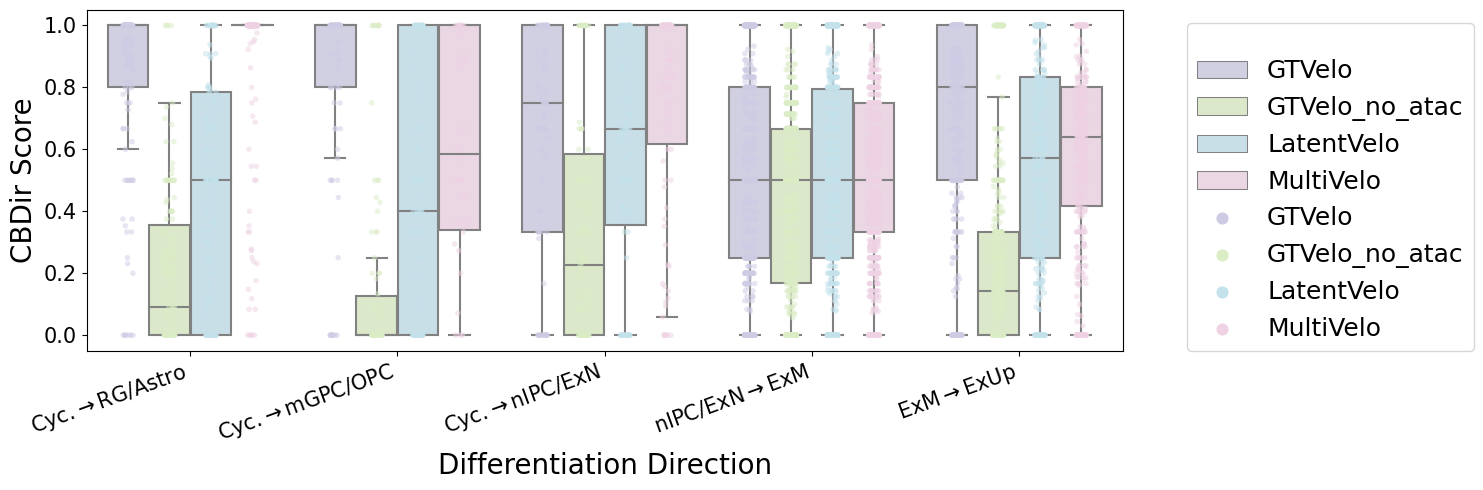

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 读取Excel文件
df = pd.read_excel('no_atac.xlsx')
plt.figure(figsize=(15, 5))
# 添加Source列（模型标识）
models = ['GTVelo_no_atac', 'GTVelo', 'LatentVelo','MultiVelo'] 
df['Source'] = [models[i//5] for i in range(len(df))]

# 添加direction列（第一列就是direction）
df['direction'] = df.iloc[:, 0]

# 只选择CBDir score列进行melting
score_cols = [col for col in df.columns if 'score_' in col]
df_melted = pd.melt(df,
                    id_vars=['direction', 'Source'],
                    value_vars=score_cols, 
                    var_name='Score Index',
                    value_name='CBDir Score')

# 移除NaN值
df_melted = df_melted.dropna()
 

# 自定义颜色映射
color_dict = {
    'GTVelo_no_atac': '#DBEDC5',
    'LatentVelo': '#C3E2EC', 
    'GTVelo': '#CECCE5',
    'MultiVelo': '#EFD2E4'
}

# 自定义模型顺序
order = [  'GTVelo','GTVelo_no_atac','LatentVelo','MultiVelo']

# 绘制箱线图
box_plot = sns.boxplot(x='direction',
                      y='CBDir Score',
                      hue='Source',
                      data=df_melted,
                      showfliers=False,
                      palette=color_dict,
                      hue_order=order,
                      width=0.8,
                      linewidth=1.5)

# 修改箱线图的所有元素颜色
for i, artist in enumerate(box_plot.artists):
    col = color_dict[order[i % len(order)]]  # 获取对应的颜色
    
    # 设置箱子
    artist.set_edgecolor(col)        # 箱子边框颜色
    artist.set_facecolor('white')    # 箱子填充色为白色
    
    # 设置须线和中位数线
    for j in range(i * 6, i * 6 + 6):
        box_plot.lines[j].set_color(col)
        box_plot.lines[j].set_mfc(col)  # 设置须线端点的颜色
        box_plot.lines[j].set_mec(col)  # 设置须线端点边框的颜色

# 在箱线图上叠加散点图
sns.stripplot(x='direction',
              y='CBDir Score', 
              hue='Source',
              data=df_melted,
              dodge=True,
              jitter=True,
              palette=color_dict,
              hue_order=order,
              alpha=0.5,
              size=4)

# # 设置样式
plt.xlabel('Differentiation Direction', fontsize=20)
plt.ylabel('CBDir Score', fontsize=20)

# 设置刻度标签字体大小
plt.xticks(rotation=20, ha='right', fontsize=15)
plt.yticks(fontsize=15)

# 调整图例
plt.legend(title=' ', bbox_to_anchor=(1.05, 1), loc='upper left',fontsize=18)

# 调整布局
plt.tight_layout()
plt.savefig(f'D:/重要文件/小论文/图片/fig4/D_differentiation.png', dpi=600) 
# 显示图形
plt.show()

# FIG4 H G

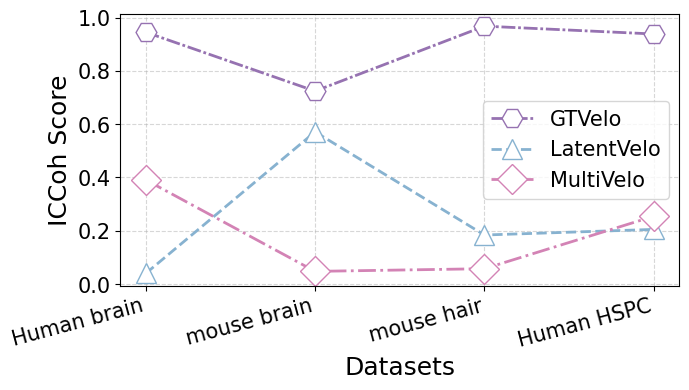

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 数据准备
data = {
    '名称': [
        'MultiVelo_Human brain',
        'MultiVelo_mouse brain',
        'MultiVelo_mouse hair',
        'MultiVelo_Human HSPC', 
        'LatentVelo_Human brain', 
        'LatentVelo_mouse brain', 
        'LatentVelo_mouse hair', 
        'LatentVelo_Human HSPC', 
        'GTVelo_Human brain', 
        'GTVelo_mouse brain', 
        'GTVelo_mouse hair',
        'GTVelo_Human HSPC'
    ],
    'score': [
        0.390906686, 
        0.047493082,
        0.057594762, 
        0.254366287, 
        0.03960596, 
        0.570893547, 
        0.183935831, 
        0.204998005, 
        0.944949818, 
        0.723895861, 
        0.967609486,
        0.938137194
    ]
}

# 将数据读取为 DataFrame
df = pd.DataFrame(data)

# 拆分名称为模型和数据集
df[['模型', '数据集']] = df['名称'].str.split('_', n=1, expand=True)

# 线条样式选择
# Python 中可用的线条样式包括：
# '-'   实线
# '--'  虚线
# '-.'  点划线
# ':'   点线
# 'None'  无线条
# 还可以使用 (0, (5, 10))  自定义线型，这里的 (5, 10) 表示 5 个点，10 个空格

# 设置样式和颜色
models = ['GTVelo', 'LatentVelo', 'MultiVelo',]
colors = ['#9672B1', '#87B2D0', '#D383B5']
markers = ['H', '^',  'D']
linestyles = [(0, (5, 1, 1, 1)), '--', '-.', ':']  # 不同的线条样式(0, (3, 1, 1, 1))

# 初始化画布
plt.figure(figsize=(7, 4))

# 遍历每个模型绘制折线图
for i, model in enumerate(models):
    model_data = df[df['模型'] == model]
    plt.plot(
        model_data['数据集'], 
        model_data['score'], 
        linestyle=linestyles[i],  # 使用不同的线条样式
        marker=markers[i], 
        color=colors[i], 
        linewidth=2,  # 线条宽度
        markersize=15,  # 增大 markers 大小
        markerfacecolor='white',  # markers 填充白色
        markeredgecolor=colors[i],  # markers 边框颜色与线条颜色一致
        label=model
    )

# 添加图表信息
plt.xticks(rotation=15, ha='right', fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Datasets", fontsize=18)
plt.ylabel("ICCoh Score", fontsize=18)
#plt.title("Model Performance Across Datasets", fontsize=20)
plt.legend(loc='best', fontsize=15, labels=['GTVelo', 'LatentVelo', 'MultiVelo'])

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

plt.savefig(f'D:/重要文件/小论文/图片/fig4/F_ICCOH.png', dpi=600) 
# 显示图表
plt.show()

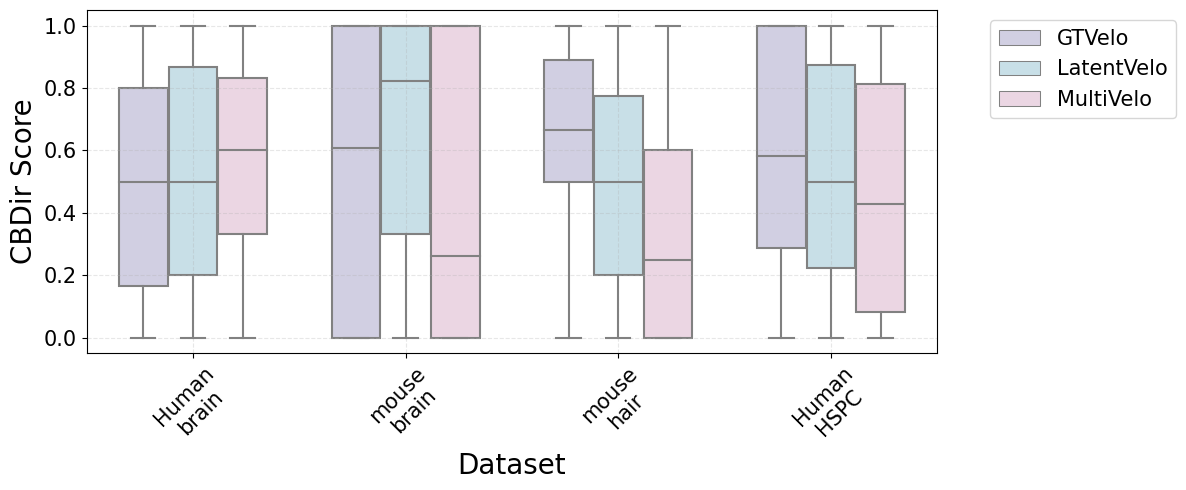

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
# 读取数据  'MultiVelo', 'LatentVelo', 'GTVelo'
data = pd.read_excel(r'D:\code\mine\GTvelo2\HSS\10x_scores.xlsx')
columns = ['MultiVelo_Human\nbrain', 'MultiVelo_mouse\nbrain', 'MultiVelo_mouse\nhair', 'MultiVelo_Human\nHSPC', 'LatentVelo_Human\nbrain', 'LatentVelo_mouse\nbrain', 'LatentVelo_mouse\nhair', 'LatentVelo_Human\nHSPC', 'GTVelo_Human\nbrain', 'GTVelo_mouse\nbrain', 'GTVelo_mouse\nhair', 'GTVelo_Human\nHSPC']
data.columns = columns

# 重组数据
melted_data = data.melt()
melted_data[['model', 'dataset']] = melted_data['variable'].str.split('_', expand=True)

# 设置图形样式和大小
plt.figure(figsize=(12, 5))
plt.style.use('default')  # 使用默认样式而不是seaborn样式

# 设置浅色透明的颜色方案
colors = {
    'LatentVelo': '#C3E2EC', 
    'GTVelo': '#CECCE5',
    'MultiVelo': '#EFD2E4'
} 
# 创建白色背景
plt.gca().set_facecolor('white')
plt.gcf().set_facecolor('white')
order = [  'GTVelo','LatentVelo','MultiVelo']

# 绘制箱线图，设置透明度
sns.boxplot(x='dataset', y='value', hue='model', data=melted_data,hue_order=order,
            palette=colors, width=0.7)

# 设置图形标题和标签的字体大小（4倍）
#plt.title('Distribution by Dataset and Model', fontsize=56, pad=20)
plt.xlabel('Dataset', fontsize=20)
plt.ylabel('CBDir Score', fontsize=20)

# 调整刻度标签大小（4倍）
plt.xticks(fontsize=15,rotation=45)
plt.yticks(fontsize=15)

# 调整图例大小（4倍）
plt.legend(fontsize=15,bbox_to_anchor=(1.05, 1), loc='upper left')

# 添加网格线（可选）
plt.grid(True, linestyle='--', alpha=0.3)

# 调整布局
plt.tight_layout()

plt.savefig(f'D:/重要文件/小论文/图片/fig4/E_CDBir.png', dpi=600) 
# 显示图形
plt.show()

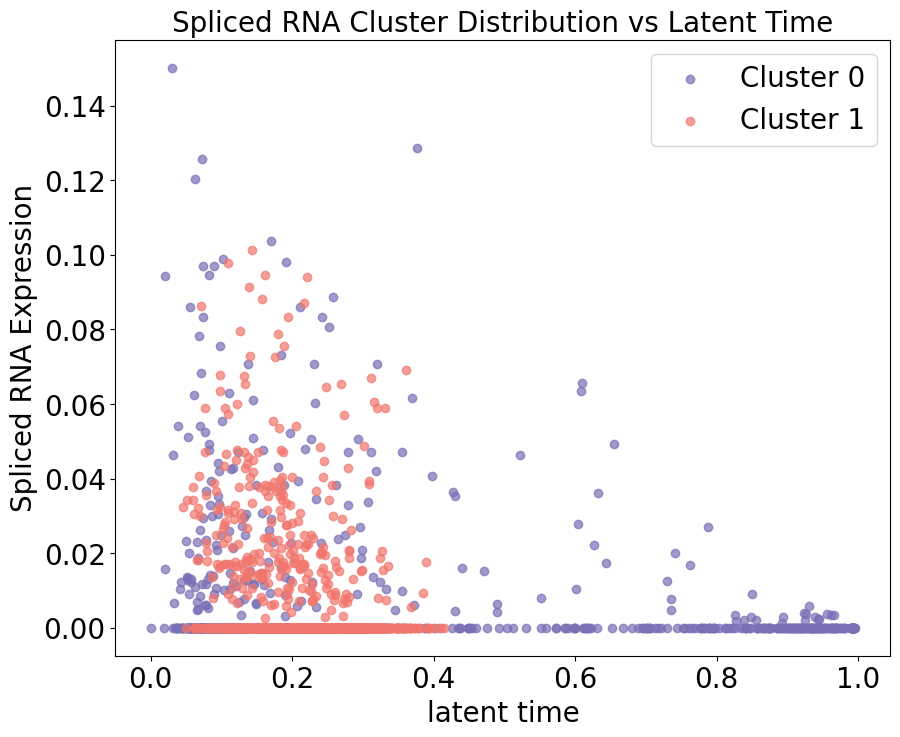

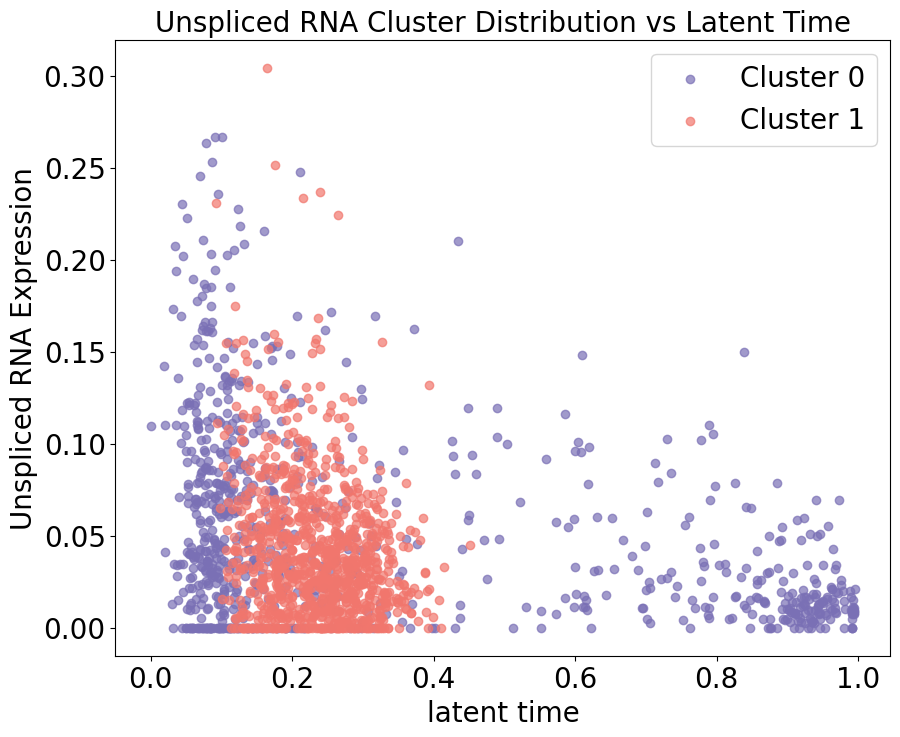

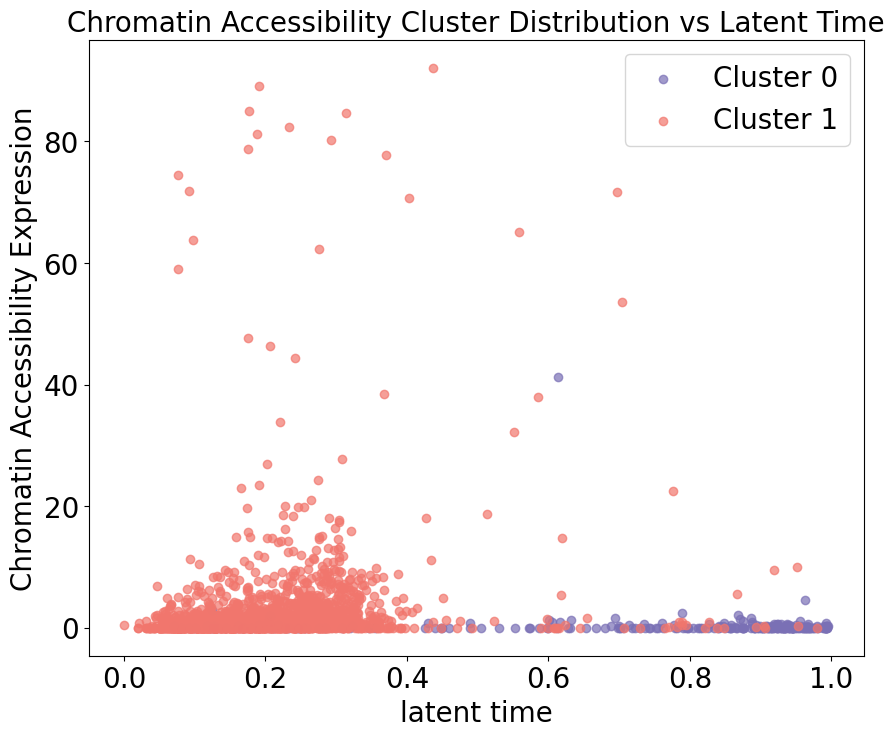

In [ ]:
import matplotlib.pyplot as plt

def plot_cluster_distribution(data, cluster_column, data_label):
    plt.figure(figsize=(10, 8))
    
    # Define the two colors manually for binary classification (e.g., 'red' and 'blue')
    cluster_1 = data[adata_filtered.obs[cluster_column] == 0]
    cluster_2 = data[adata_filtered.obs[cluster_column] == 1]
    
    # Scatter plot for the two clusters with different colors
    plt.scatter(adata_filtered.obs['latent_time'][adata_filtered.obs[cluster_column] == 0], 
                cluster_1[:, 0], color='#7A70B5', alpha=0.7, label='Cluster 0')
    plt.scatter(adata_filtered.obs['latent_time'][adata_filtered.obs[cluster_column] == 1], 
                cluster_2[:, 0], color='#F1766D', alpha=0.7, label='Cluster 1')

    # Set the title and axis labels
    plt.title(f'{data_label} Cluster Distribution vs Latent Time', fontsize=20)
    plt.xlabel('latent time', fontsize=20)
    plt.ylabel(f'{data_label} Expression', fontsize=20)
    plt.tick_params(axis='both', labelsize=20)
    # Add the legend for clusters
    plt.legend(fontsize=20)
    filename = 'C' + data_label + '.png'
    plt.savefig(f'D:/重要文件/小论文/图片/fig4/{filename}', dpi=600) 

    # Show the plot
    plt.show()
plot_cluster_distribution(spliced, 'spliced_cluster', 'Spliced RNA')
plot_cluster_distribution(unspliced, 'unspliced_cluster', 'Unspliced RNA')
plot_cluster_distribution(chromatin, 'chromatin_cluster', 'Chromatin Accessibility')